# **Final Python Notebook 2: Mortality Status Classifiers, their performances and Hyperparameters optimisations**

Author : Sundaralingam Gokula Nandhan

Reviewer : None

Date of The Review : None

Code Reuse Session : 02 | Tutorial No : 03(Page 5)

In [ ]:
#import pandas library
import pandas as pd

Code Reuse Session : 02 | Tutorial No : 03(Page 5)

In [ ]:
#import dataset to the enviroment
dataset=pd.read_csv('/content/drive/MyDrive/level05/ML/Coursework/classification_dataset.csv')

Code Reuse Session : 02 | Tutorial No : 03(Page 5)

In [ ]:
#print first 15 rows of the dataset
dataset.head(15)

,Age,Sex,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Regional_Node_Positive,Survival_Months,Mortality_Status
0,68,2,1,1,1,1,3,1,4,1,1,24,1,60,1
1,50,2,2,2,2,0,2,1,35,1,1,14,5,62,1
2,58,2,1,1,1,1,3,1,18,1,1,2,1,84,1
3,47,2,2,1,4,1,3,1,41,1,1,3,1,50,1
4,51,2,1,1,1,0,2,1,20,1,1,18,2,89,1
5,51,2,1,1,1,3,1,1,8,1,1,11,1,54,1
6,40,2,2,1,4,0,2,1,30,1,1,9,1,14,0
7,40,2,4,3,3,1,3,1,30,1,1,20,4,70,1
8,69,2,4,3,3,3,1,2,32,1,1,21,4,92,1
9,68,2,1,1,1,0,2,1,13,1,1,9,1,64,0


Code Reuse Session : 02 | Tutorial No : 01(Page 17)

In [ ]:
#print the entire count of rows and columns
dataset.shape

(3655, 15)

Code Reuse Session : 02 | Tutorial No : 01(Page 16)

In [ ]:
#check data entries
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3655 entries, 0 to 3654
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     3655 non-null   int64
 1   Sex                     3655 non-null   int64
 2   T_Stage                 3655 non-null   int64
 3   N_Stage                 3655 non-null   int64
 4   6th_Stage               3655 non-null   int64
 5   Differentiated          3655 non-null   int64
 6   Grade                   3655 non-null   int64
 7   A_Stage                 3655 non-null   int64
 8   Tumor_Size              3655 non-null   int64
 9   Estrogen_Status         3655 non-null   int64
 10  Progesterone_Status     3655 non-null   int64
 11  Regional_Node_Examined  3655 non-null   int64
 12  Regional_Node_Positive  3655 non-null   int64
 13  Survival_Months         3655 non-null   int64
 14  Mortality_Status        3655 non-null   int64
dtypes: int64(15)
memory u

Code Reuse Session : 01 | Tutorial No : 01(Page 24)

In [ ]:
#methods to control the rows and columns truncation in dataset
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)

Code Reuse Session : 02 | Tutorial No : 03(Page 5)

In [ ]:
#split the dataset into features(X) and target variable(Y)
X = dataset.drop('Mortality_Status', axis=1)
Y = dataset['Mortality_Status']

Code Reuse Session : 02 | Tutorial No : 03(Page 5)

In [ ]:
#import train-test-split module from scikit-learn
from sklearn.model_selection import train_test_split

Code Reuse Session : 02 | Tutorial No : 03(Page 5)

In [ ]:
#split the data into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state= 42, stratify = Y)

Code Reuse Session : 02 | Tutorial No : 01(Page 16)

In [ ]:
#display information about the training features dataset
X_train.info()
print("\n")

#display the same structural information for the testing features dataset
X_test.info()
print("\n")

#display info about the training target variable (Mortality Status)
Y_train.info()
print("\n")

#display info about the test target variable to verify consistency
Y_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2924 entries, 1850 to 437
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     2924 non-null   int64
 1   Sex                     2924 non-null   int64
 2   T_Stage                 2924 non-null   int64
 3   N_Stage                 2924 non-null   int64
 4   6th_Stage               2924 non-null   int64
 5   Differentiated          2924 non-null   int64
 6   Grade                   2924 non-null   int64
 7   A_Stage                 2924 non-null   int64
 8   Tumor_Size              2924 non-null   int64
 9   Estrogen_Status         2924 non-null   int64
 10  Progesterone_Status     2924 non-null   int64
 11  Regional_Node_Examined  2924 non-null   int64
 12  Regional_Node_Positive  2924 non-null   int64
 13  Survival_Months         2924 non-null   int64
dtypes: int64(14)
memory usage: 342.7 KB


<class 'pandas.core.frame.DataFrame'>

Code Reuse Session : 02 | Tutorial No : 01(Page 16, 17)

In [ ]:
#print the list of all features in the dataset
print(dataset.columns)
print("\n")

#display the shape of the training and test feature sets
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Index(['Age', 'Sex', 'T_Stage', 'N_Stage', '6th_Stage', 'Differentiated', 'Grade', 'A_Stage', 'Tumor_Size', 'Estrogen_Status', 'Progesterone_Status',
       'Regional_Node_Examined', 'Regional_Node_Positive', 'Survival_Months', 'Mortality_Status'],
      dtype='object')


Training set shape: (2924, 14)
Test set shape: (731, 14)


Code Reuse Session : 02 | Tutorial No : 03(Page 9)

In [ ]:
#import LogisticRegression from scikit-learn linear_model module
from sklearn.linear_model import LogisticRegression

Code Reuse Session : 02 | Tutorial No : 03(Page 9)

In [ ]:
#declare the logistic regression model
logreg = LogisticRegression(max_iter = 4000)

#fitting the Logistic Regression model using the training data
logreg.fit(X_train, Y_train)

LogisticRegression(max_iter=4000)

Code Reuse Session : 02 | Tutorial No : 03(Page 9)

In [ ]:
#applying the trained Logistic Regression model to the training set to generate predicted labels
Y_pred_train = logreg.predict(X_train)

#applying the trained Logistic Regression model to the test set to generate predicted labels
Y_pred = logreg.predict(X_test)

Code Reuse Session : 02 | Tutorial No : 03(Page 9)

In [ ]:
#displaying the comparison DataFrame(actual vs. predicted mortality status of patients)
Comparison_dataset = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
Comparison_dataset

,Actual,Predicted
3371,1,1
1576,1,1
386,1,1
1434,1,1
2047,1,1
...,...,...
1465,0,0
3434,1,1
102,1,1
1367,1,1


Code Reuse Session : 02 | Tutorial No : 03(Page 10, 11, 12)

In [ ]:
#import evaluation metrics and visualization tools from scikit-learn
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay

Code Reuse Session : 02 | Tutorial No : 03(Page 11)

In [ ]:
#calculate accuracy score on mortality prediction using logistic regression
lr_train_accuracy = accuracy_score(Y_train, Y_pred_train)
print("The Accuracy of Logistic Regression Trained :", lr_train_accuracy)

#calculate accuracy score on mortality prediction using logistic regression
lr_test_accuracy = accuracy_score(Y_test, Y_pred)
print("The Accuracy of Logistic Regression Tested :", lr_test_accuracy)

The Accuracy of Logistic Regression Trained : 0.8980848153214774
The Accuracy of Logistic Regression Tested : 0.9028727770177839


Code Reuse Session : 02 | Tutorial No : 03(Page 11)

In [ ]:
#generate classification report of logistic regression
print("Logistic Regression Report :")
print(classification_report(Y_test, Y_pred))

Logistic Regression Report :
              precision    recall  f1-score   support

           0       0.75      0.47      0.58       104
           1       0.92      0.97      0.95       627

    accuracy                           0.90       731
   macro avg       0.84      0.72      0.76       731
weighted avg       0.89      0.90      0.89       731



Code Reuse Session : 02 | Tutorial No : 03(Page 10)

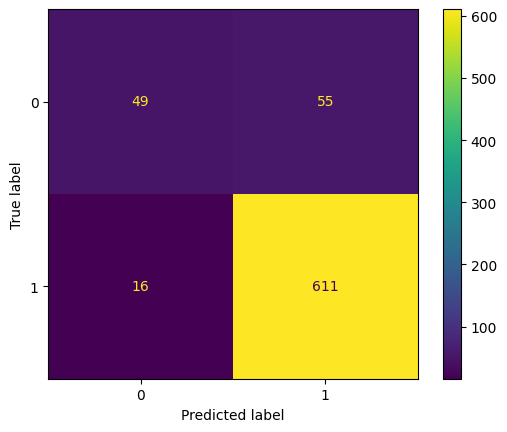

In [ ]:
#calculate and display confusion matrix of logistic regression
cm = confusion_matrix(Y_test, Y_pred, labels = logreg.classes_)
display = ConfusionMatrixDisplay(cm, display_labels = logreg.classes_)
display.plot();

Code Reuse Session : 02 | Tutorial No : 03(Page 11)

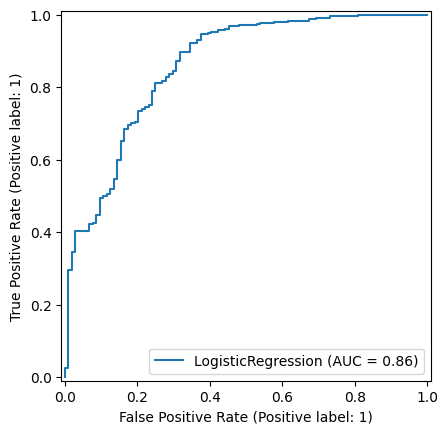

In [ ]:
#display AUC-ROC curve of logistic regression
logreg = RocCurveDisplay.from_estimator(logreg, X_test, Y_test)

Code Reuse Session : 02 | Tutorial No : 04(Page 7)

In [ ]:
#import KNeighboursClassifier from scikit-learn linear_model module
from sklearn.neighbors import KNeighborsClassifier

Code Reuse Session : 02 | Tutorial No : 04(Page 7)

In [ ]:
#declare the knn model
knn = KNeighborsClassifier(n_neighbors = 5)

#fitting knn model using the training data
knn.fit(X_train, Y_train)

KNeighborsClassifier()

Code Reuse Session : 02 | Tutorial No : 04(Page 7)

In [ ]:
#applying the trained knn model to the training set to generate predicted labels
Y_pred_train = knn.predict(X_train)

#applying the trained knn model to the test set to generate predicted labels
Y_pred = knn.predict(X_test)

Code Reuse Session : 02 | Tutorial No : 04(Page 7)

In [ ]:
#predicing on isolated unseen data by knn
knn.predict(X_test)

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,

Code Reuse Session : 02 | Tutorial No : 03(Page 11)

In [ ]:
#calculate accuracy score of trained on mortality prediction using knn
accuracy = accuracy_score(Y_train, Y_pred_train)
print("The Accuracy of KNN Trained :", accuracy)

#calculate accuracy score of tested on mortality prediction using knn
accuracy = accuracy_score(Y_test, Y_pred)
print("The Accuracy of KNN Tested :", accuracy)

The Accuracy of KNN Trained : 0.9141586867305062
The Accuracy of KNN Tested : 0.8850889192886456


Code Reuse Session : 02 | Tutorial No : 03(Page 11)

In [ ]:
#generate classification report of knn
print("KNN Report :")
print(classification_report(Y_test, Y_pred))

KNN Report :
              precision    recall  f1-score   support

           0       0.64      0.45      0.53       104
           1       0.91      0.96      0.93       627

    accuracy                           0.89       731
   macro avg       0.77      0.70      0.73       731
weighted avg       0.87      0.89      0.88       731



Code Reuse Session : 02 | Tutorial No : 03(Page 10)

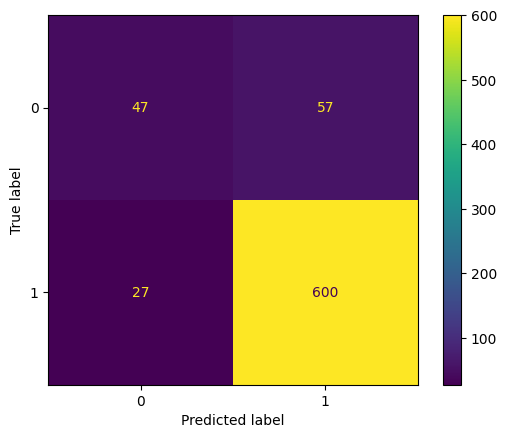

In [ ]:
#calculate and display confusion matrix of knn
cm = confusion_matrix(Y_test, Y_pred, labels = knn.classes_)
display = ConfusionMatrixDisplay(cm, display_labels = knn.classes_)
display.plot();

Code Reuse Session : 02 | Tutorial No : 03(Page 11)

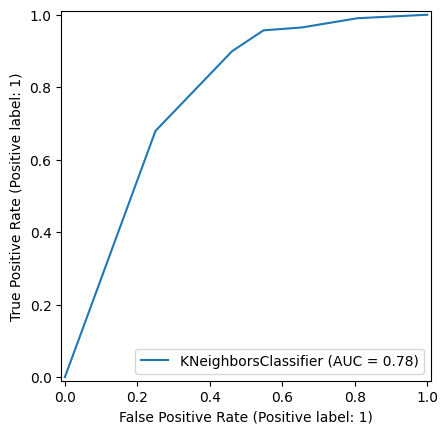

In [ ]:
#display AUC-ROC curve of knn
knn_diag = RocCurveDisplay.from_estimator(knn, X_test, Y_test)

Code Reuse Session : 02 | Tutorial No : 04(Page 15)

In [ ]:
#import GaussianNB from scikit-learn naive bayes module
from sklearn.naive_bayes import GaussianNB

Code Reuse Session : 02 | Tutorial No : 04(Page 15)

In [ ]:
#declare the naive bayes model
nb = GaussianNB()

#fitting naive bayes model using the training data
nb.fit(X_train, Y_train)

GaussianNB()

Code Reuse Session : 02 | Tutorial No : 04(Page 15)

In [ ]:
#applying the trained naive bayes model to the training set to generate predicted labels
Y_pred_train = nb.predict(X_train)

#applying the trained naive bayes model to the test set to generate predicted labels
Y_pred = nb.predict(X_test)

Code Reuse Session : 02 | Tutorial No : 04(Page 7)

In [ ]:
#predicing on isolated unseen data by naive bayes
nb.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,

Code Reuse Session : 02 | Tutorial No : 03(Page 11)

In [ ]:
#calculate accuracy score on mortality prediction using naive bayes
accuracy = accuracy_score(Y_train, Y_pred_train)
print("The Accuracy of Naive Bayes Trained :", accuracy)

#calculate accuracy score of tested on mortality prediction using naive bayes
accuracy = accuracy_score(Y_test, Y_pred)
print("The accuracy of Naive Bayes Tested :", accuracy)

The Accuracy of Naive Bayes Trained : 0.8419972640218878
The accuracy of Naive Bayes Tested : 0.8426812585499316


Code Reuse Session : 02 | Tutorial No : 03(Page 11)

In [ ]:
#generate classification report of naive bayes
print("Naive Bayes Report :")
print(classification_report(Y_test, Y_pred))

Naive Bayes Report :
              precision    recall  f1-score   support

           0       0.45      0.52      0.48       104
           1       0.92      0.90      0.91       627

    accuracy                           0.84       731
   macro avg       0.69      0.71      0.70       731
weighted avg       0.85      0.84      0.85       731



Code Reuse Session : 02 | Tutorial No : 03(Page 10)

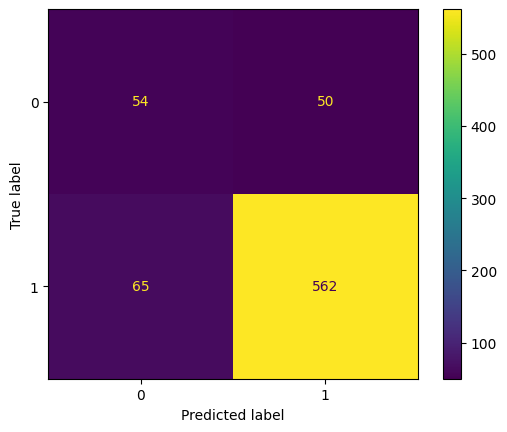

In [ ]:
#calculate and display confusion matrix of naive bayes
cm = confusion_matrix(Y_test, Y_pred, labels = nb.classes_)
disp = ConfusionMatrixDisplay(cm)
disp.plot();

Code Reuse Session : 02 | Tutorial No : 03(Page 11)

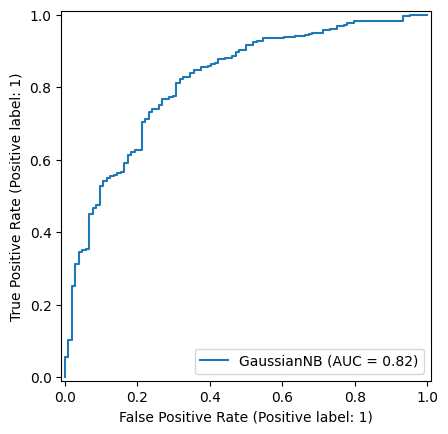

In [ ]:
#display AUC-ROC curve of naive bayes
nb_roc_diag = RocCurveDisplay.from_estimator(nb, X_test, Y_test)

Code Reuse Session : 02 | Tutorial No : 04(Page 11)

In [ ]:
#import GridSearchCV from scikit-learn model_selection module
from sklearn.model_selection import GridSearchCV

Code Reuse Session : 02 | Tutorial No : 04(Page 11)

In [ ]:
#tune KNN using GridSearchCV to find the best number of neighbors
param_grid = {'n_neighbors': [3, 5, 7, 9]}
knn_gscv = GridSearchCV(KNeighborsClassifier(), param_grid, cv = 5)
knn_gscv.fit(X,Y)
knn_gscv.best_params_

{'n_neighbors': 9}

Code Reuse Session : 02 | Tutorial No : 04(Page 12)

In [ ]:
#predicting test labels using the tuned KNN model
Y_pred_knn_gscv = knn_gscv.predict(X_test)

Code Reuse Session : 02 | Tutorial No : 03(Page 11)

In [ ]:
#generate classification report of tuned KNN
print("Tuned KNN Report :")
print(classification_report(Y_test, Y_pred_knn_gscv))

Tuned KNN Report :
              precision    recall  f1-score   support

           0       0.69      0.48      0.57       104
           1       0.92      0.96      0.94       627

    accuracy                           0.90       731
   macro avg       0.81      0.72      0.75       731
weighted avg       0.89      0.90      0.89       731



Code Reuse Session : 02 | Tutorial No : 03(Page 10)

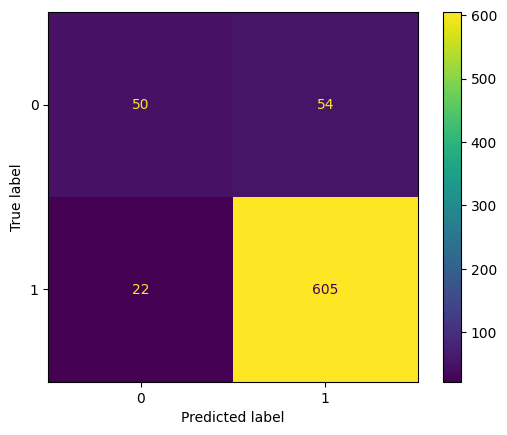

In [ ]:
#calculate and display confusion matrix of tuned KNN
cm = confusion_matrix(Y_test, Y_pred_knn_gscv, labels = knn_gscv.classes_)
display = ConfusionMatrixDisplay(cm)
display.plot();

Code Reuse Session : 02 | Tutorial No : 03(Page 11)

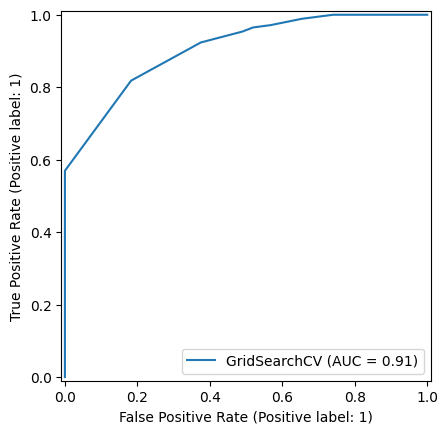

In [ ]:
#display AUC-ROC curve of tuned KNN
knn_diag = RocCurveDisplay.from_estimator(knn_gscv, X_test, Y_test)